In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv('https://coded2.herokuapp.com/datavizpandas/londonweather.csv')
weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


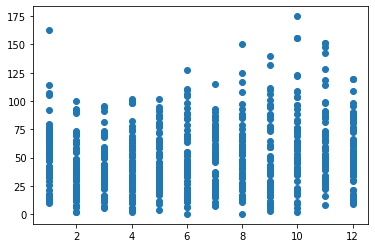

In [4]:
# scatter plot between Month and Rain
plt.scatter(weather['Month'], weather['Rain']) 
plt.show() 

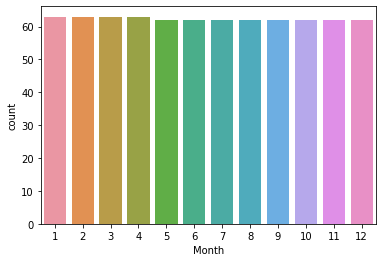

In [6]:
import seaborn as sns
sns.countplot(weather['Month'],label="Count")
plt.show()

In [8]:
print(weather.shape)

print(weather['Month'].unique())

print(weather.groupby('Month').size())

(748, 6)
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Month
1     63
2     63
3     63
4     63
5     62
6     62
7     62
8     62
9     62
10    62
11    62
12    62
dtype: int64


Regresi Tunggal
--------------------------
Hasil Regresi Tunggal
intercept : 48.7478966312513
slope : [0.23129553]
coefficient of determination: 0.0012008307613293745


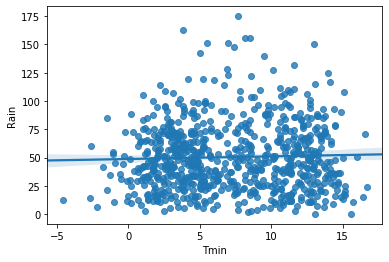

In [12]:
print('Regresi Tunggal')
print('--------------------------')
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Read data
data=pd.read_csv('https://coded2.herokuapp.com/datavizpandas/londonweather.csv')
#print(data)

#Deklarasi data
x=np.array(data['Tmin']).reshape(-1,1)
y=np.array(data['Rain'])

#Creat a model and fit it
model=LinearRegression()
model.fit(x,y)
model=LinearRegression().fit(x,y)

print('Hasil Regresi Tunggal')
print('intercept :', model.intercept_)
print('slope :',model.coef_)

#Get Result
r_sq=model.score(x,y)
print('coefficient of determination:', r_sq)

#Regression Plot
sns.regplot(x='Tmin',y='Rain', data=data)
plt.show()

In [13]:
print('Multiple Regression')
print('--------------------')
from sklearn import linear_model

# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x, y) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

xd=np.array([0.1]).reshape(-1,1)
yd=np.array([10])
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(xd, yd))) 

Multiple Regression
--------------------
Coefficients: 
 [0.23129553]
Variance score: nan


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


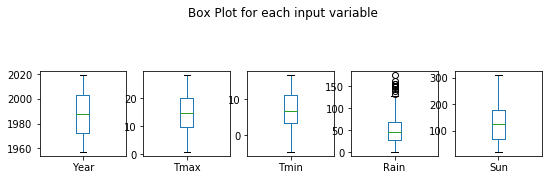

In [23]:
weather.drop('Month', axis=1).plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('Month')
plt.show()

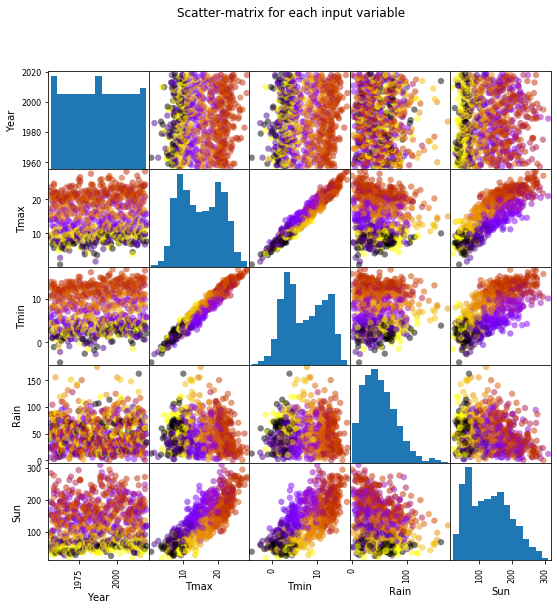

In [24]:
from pandas.plotting import scatter_matrix #aslinya: pandas.tools.plotting
from matplotlib import cm
feature_names = ['Year', 'Tmax', 'Tmin', 'Rain', 'Sun']
X = weather[feature_names]
y = weather['Month']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.48
Accuracy of Logistic regression classifier on test set: 0.36


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.42


In [28]:
from sklearn import tree

[Text(190.97489082969435, 210.192, 'X[2] <= 0.533\ngini = 0.916\nsamples = 561\nvalue = [49, 43, 46, 50, 48, 52, 45, 39, 46, 47, 46, 50]'),
 Text(125.98403384279477, 195.696, 'X[4] <= 0.284\ngini = 0.841\nsamples = 280\nvalue = [49, 43, 46, 45, 2, 0, 0, 0, 0, 5, 41, 49]'),
 Text(91.8781113537118, 181.2, 'X[1] <= 0.359\ngini = 0.786\nsamples = 195\nvalue = [49, 40, 15, 1, 0, 0, 0, 0, 0, 2, 39, 49]'),
 Text(57.2924672489083, 166.704, 'X[4] <= 0.148\ngini = 0.747\nsamples = 159\nvalue = [49, 38, 9, 0, 0, 0, 0, 0, 0, 0, 16, 47]'),
 Text(27.22991266375546, 152.208, 'X[1] <= 0.246\ngini = 0.663\nsamples = 93\nvalue = [30, 15, 1, 0, 0, 0, 0, 0, 0, 0, 5, 42]'),
 Text(8.406550218340612, 137.712, 'X[4] <= 0.078\ngini = 0.614\nsamples = 34\nvalue = [17, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11]'),
 Text(2.9240174672489085, 123.216, 'X[4] <= 0.012\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]'),
 Text(1.4620087336244543, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0

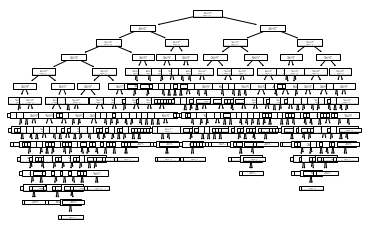

In [29]:
tree.plot_tree(clf)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.45


In [31]:
print(knn.score(X_test, y_test))

0.44919786096256686


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))


Accuracy of LDA classifier on training set: 0.61
Accuracy of LDA classifier on test set: 0.52


In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.57
Accuracy of GNB classifier on test set: 0.44


In [34]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.39
Accuracy of SVM classifier on test set: 0.29


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8  3  0  0  0  0  0  0  0  0  0  3]
 [ 8  5  2  0  0  0  0  0  0  0  3  2]
 [ 6  1  7  3  0  0  0  0  0  0  0  0]
 [ 0  0  4  7  2  0  0  0  0  0  0  0]
 [ 0  0  0  1 10  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  2  0  3  1  0  0]
 [ 0  0  0  0  0  2  8  5  2  0  0  0]
 [ 0  0  0  0  0  8 10  2  3  0  0  0]
 [ 0  0  0  0  0  2  0  1 12  1  0  0]
 [ 0  0  0  3  2  0  0  0  1  9  0  0]
 [ 1  2  2  0  0  0  0  0  0  1  9  1]
 [ 7  1  0  0  0  0  0  0  0  0  1  3]]
              precision    recall  f1-score   support

           1       0.27      0.57      0.36        14
           2       0.42      0.25      0.31        20
           3       0.47      0.41      0.44        17
           4       0.50      0.54      0.52        13
           5       0.71      0.71      0.71        14
           6       0.24      0.40      0.30        10
           7       0.40      0.47      0.43        17
           8       0.25      0.09      0.13        23
           9       0.57      0.75      0.65 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('https://coded2.herokuapp.com/datavizpandas/londonweather.csv')

In [3]:
data.shape

(748, 6)

In [4]:
data.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


In [6]:
#Data Sampling

sampled_df = data[(data['Month'] % 10) == 0]
sampled_df.shape

(62, 6)

In [7]:
#Statistic

sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,62.0,1987.500000,18.041619,1957.0,1972.250,1987.50,2002.750,2018.0
Month,62.0,10.000000,0.000000,10.0,10.000,10.00,10.000,10.0
Tmax,62.0,15.611290,1.465796,11.0,14.725,15.60,16.500,18.3
Tmin,62.0,8.367742,1.448773,5.0,7.625,8.50,8.975,11.3
Rain,62.0,60.496774,37.621750,1.6,35.950,54.55,76.375,174.8
Sun,62.0,109.890323,22.669440,61.4,94.200,109.95,122.025,166.0


In [8]:
sampled_df[sampled_df['Tmax'] == 0].shape

(0, 6)

In [9]:
sampled_df[sampled_df['Tmin'] == 0].shape

(0, 6)

In [10]:
sampled_df[sampled_df['Rain'] == 0].shape

(0, 6)

In [11]:
sampled_df[sampled_df['Sun'] == 0].shape

(0, 6)

In [33]:
del sampled_df['Year']
del sampled_df['Month']

In [34]:
#Drop all the Rows with Empty 

rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [35]:
#How many rows
rows_before - rows_after

0

In [36]:
sampled_df.columns

Index(['Tmax', 'Tmin'], dtype='object')

In [37]:
#Select Features of Interest for Clustering

features = ['Tmax', 'Tmin']

In [38]:
select_df = sampled_df[features]

In [39]:
select_df.columns

Index(['Tmax', 'Tmin'], dtype='object')

In [40]:
select_df

,Tmax,Tmin
9,15.5,7.7
21,14.9,8.3
33,17.8,8.5
45,14.2,8.2
57,15.6,7.6
...,...,...
693,17.6,11.0
705,15.8,9.3
717,15.9,8.7
729,17.1,10.3


In [41]:
#Scale the Features using StandardScaler

X = StandardScaler().fit_transform(select_df)
X

array([[-0.07654462, -0.46466432],
       [-0.48921998, -0.04713986],
       [ 1.50537759,  0.09203496],
       [-0.97067457, -0.11672727],
       [-0.0077654 , -0.53425173],
       [ 0.06101383, -0.88218878],
       [-0.55799921, -0.11672727],
       [-1.3145707 , -2.13476215],
       [ 0.40490996, -0.60383914],
       [-0.62677844,  0.16162237],
       [-0.42044076,  0.30079719],
       [ 0.61124764,  1.62295798],
       [ 1.7804945 ,  1.0662587 ],
       [ 0.06101383, -0.18631468],
       [ 1.09270223, -0.18631468],
       [-0.0077654 ,  0.09203496],
       [-1.17701225, -1.57806287],
       [-3.17160983, -2.34352438],
       [-0.83311612, -0.95177619],
       [-0.48921998,  0.30079719],
       [ 0.47368919,  0.43997201],
       [ 1.023923  ,  0.02244755],
       [ 0.54246842,  0.30079719],
       [-1.10823302, -1.7868251 ],
       [-1.86480452, -1.7868251 ],
       [-1.0394538 , -0.39507691],
       [-0.35166153, -0.53425173],
       [ 0.12979306,  0.09203496],
       [ 0.33613074,

In [42]:
#Use k-Means Clustering

kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [43]:
#What are the centers of 12 clusters we formed ?

centers = model.cluster_centers_
centers

array([[-1.09103822, -1.71723769],
       [-0.48157785,  0.1461585 ],
       [ 1.7804945 ,  1.18223771],
       [ 0.47368919,  0.36168617],
       [-0.07654462, -0.5968804 ],
       [-3.17160983, -2.34352438],
       [ 1.43659837,  1.97089503],
       [ 1.20733428, -0.02394405],
       [-0.90189534, -0.45074683],
       [-0.0077654 ,  0.06221179],
       [ 0.9001204 ,  1.26110345],
       [-1.93358375, -1.62445448]])

In [44]:
#Plots
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [45]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [46]:
P = pd_centers(features, centers)
P

,Tmax,Tmin,prediction
0,-1.091038,-1.717238,0
1,-0.481578,0.146159,1
2,1.780494,1.182238,2
3,0.473689,0.361686,3
4,-0.076545,-0.596880,4
5,-3.171610,-2.343524,5
6,1.436598,1.970895,6
7,1.207334,-0.023944,7
8,-0.901895,-0.450747,8
9,-0.007765,0.062212,9


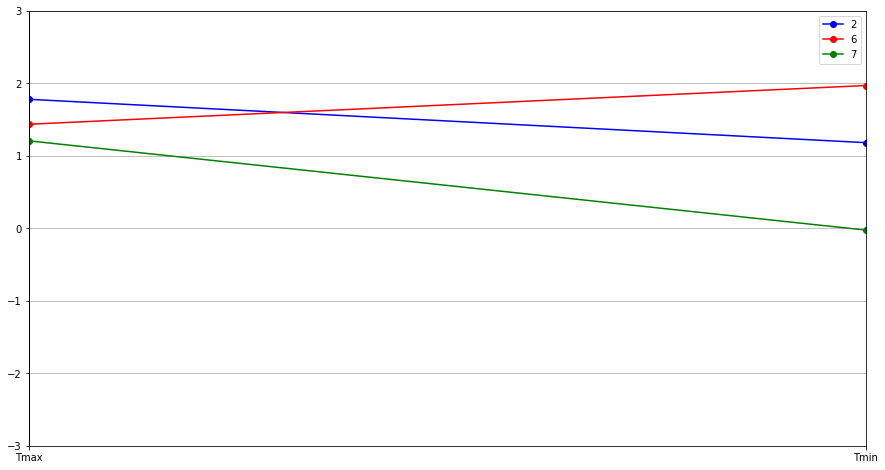

In [52]:
#Dry Days
parallel_plot(P[P['Tmax'] > 1])

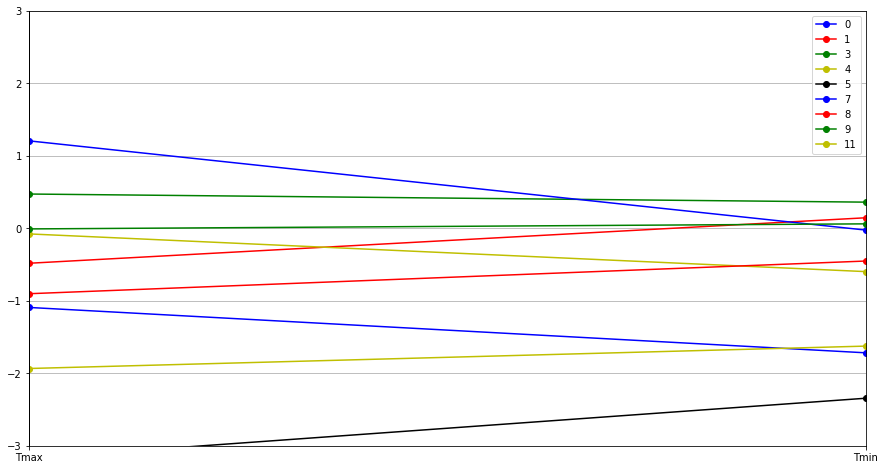

In [56]:
#Cool Days
parallel_plot(P[P['Tmin'] < 1])

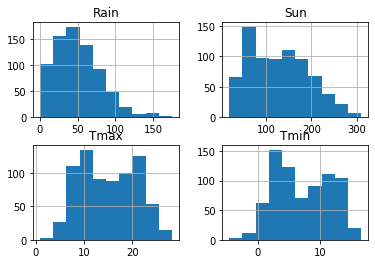

In [59]:
#import pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt 
  
# create 2D array of table given above 
data = pd.read_csv('https://coded2.herokuapp.com/datavizpandas/londonweather.csv')
  
# dataframe created with 
# the above data array 
df = pd.DataFrame(data, columns = ['Tmax', 'Tmin',  
                                    'Sun', 'Rain'] ) 
  
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show() 

In [67]:
del sampled_df['Tmax']
del sampled_df['Tmin']

In [69]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

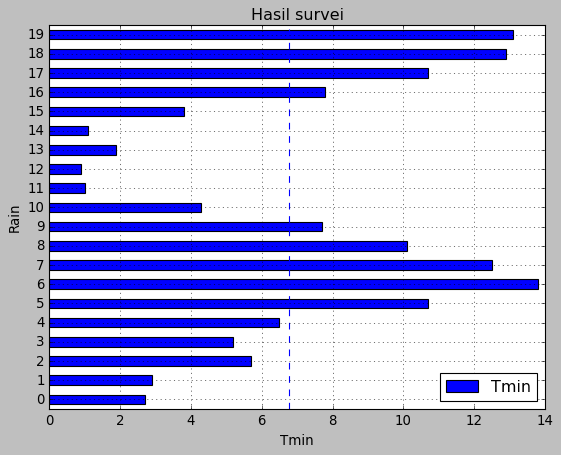

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca hasil survei kelas jumat sore
# di https://goo.gl/forms/PS9AvkWJ2bFUWE8Z2
data = pd.read_csv('https://coded2.herokuapp.com/datavizpandas/londonweather.csv')

# Menggunakan style bernama classic
plt.style.use('classic')

# Dapatkan fig dan ax
fig, ax = plt.subplots()

# Plot data jarak 20 peserta ke ITS (dalam km)
data[0:20].plot(kind='barh',y="Tmin",ax=ax)

# Hitung mean, lalu tampilkan garis vertikalnya
avg = data[0:20]['Tmin'].mean()
ax.axvline(x=avg, color='b', label='Rerata', linestyle='--', linewidth=1)

# Atur tampilan
ax.set(xlabel = "Tmin", ylabel = "Rain", title="Hasil survei")
ax.grid()

plt.show()